# **Time Series 1**

In [ ]:
#Load Library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w3/P1W3D4AM%20-%20Time%20Series%20-%20Part%201%20-%20AirPassengers.csv')
df.tail()

,date,value
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [ ]:
#splitting train and test
train=df[0:100] 
test=df[100:]

test.tail()

,date,value
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


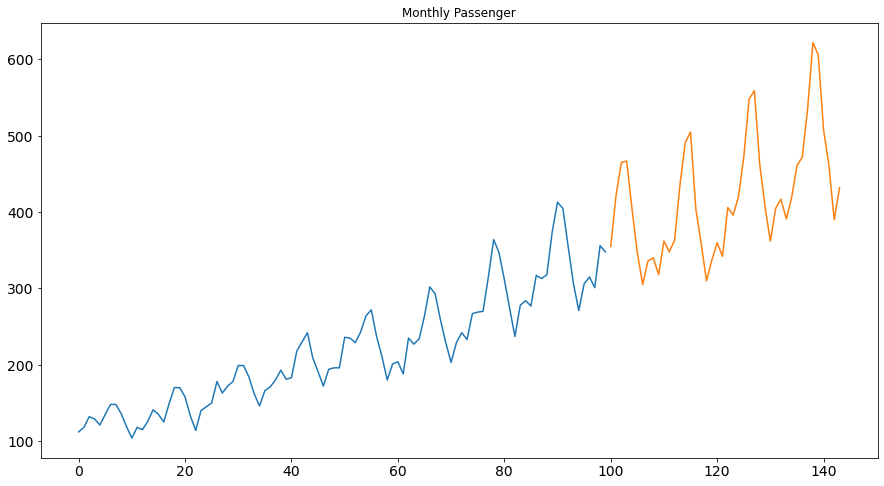

In [ ]:
train.value.plot(figsize=(15,8), title= 'Monthly Passenger', fontsize=14)
test.value.plot(figsize=(15,8), title= 'Monthly Passenger', fontsize=14)

plt.show()

In [ ]:
train=train.set_index('date')
test=test.set_index('date')

# **Stasionarity**

In [ ]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
check_stationarity(train['value'])

ADF Statistic: 1.509804
p-value: 0.997560
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585
Non-stationary


# **Naive Approach**

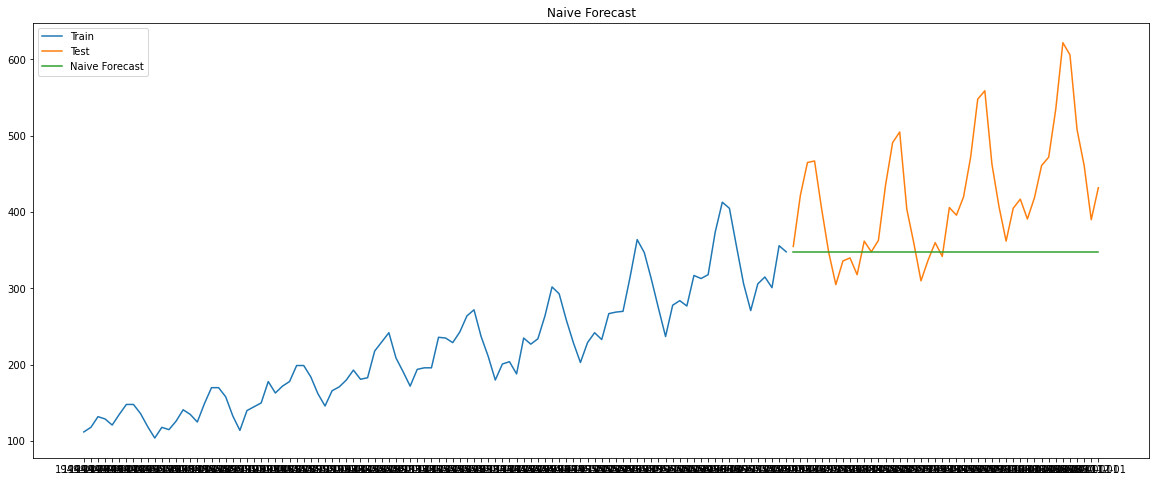

In [ ]:
dd= np.asarray(train.value)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(20,8))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index,test['value'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rmse = sqrt(mean_squared_error(test.value, y_hat.naive))
mae = mean_absolute_error(test.value, y_hat.naive)

print("mae :",mae)
print("rmse :",rmse)

mae : 79.8409090909091
rmse : 105.74981194911284


# **Simple Average**

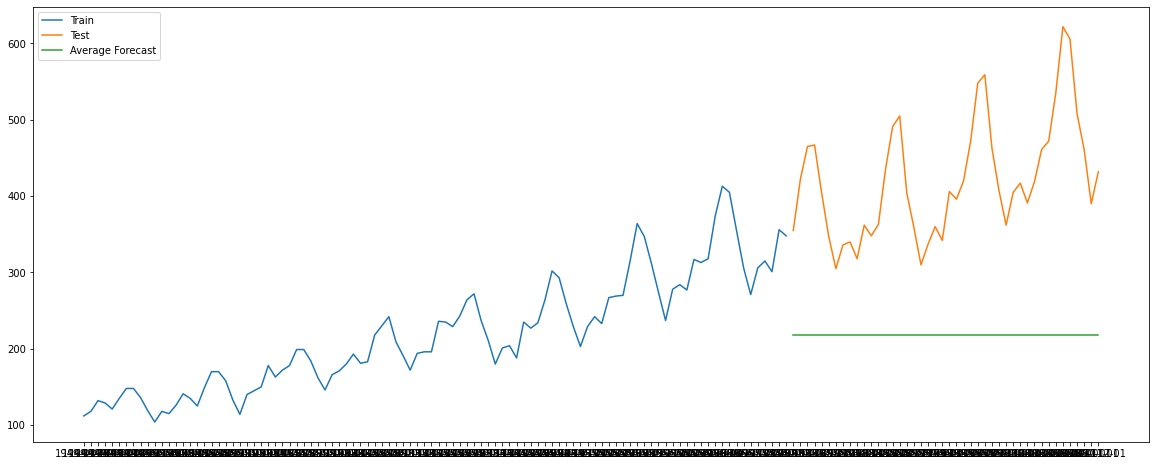

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['value'].mean()
plt.figure(figsize=(20,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
print("mae :", mean_absolute_error(test.value, y_hat_avg.avg_forecast))
print("rmse :", sqrt(mean_squared_error(test.value, y_hat_avg.avg_forecast)))

mae : 202.70818181818174
rmse : 216.64411025710095


# **Moving Average**

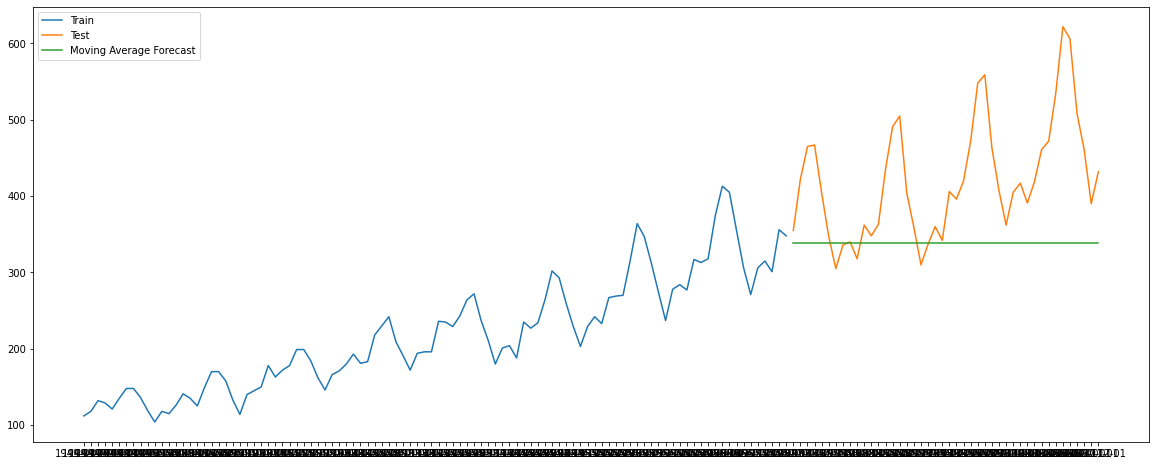

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['value'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(20,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
print("mae :", mean_absolute_error(test.value, y_hat_avg.moving_avg_forecast))
print("rmse :", sqrt(mean_squared_error(test.value, y_hat_avg.moving_avg_forecast)))

mae : 86.11363636363636
rmse : 112.15725567256004


# **SES**

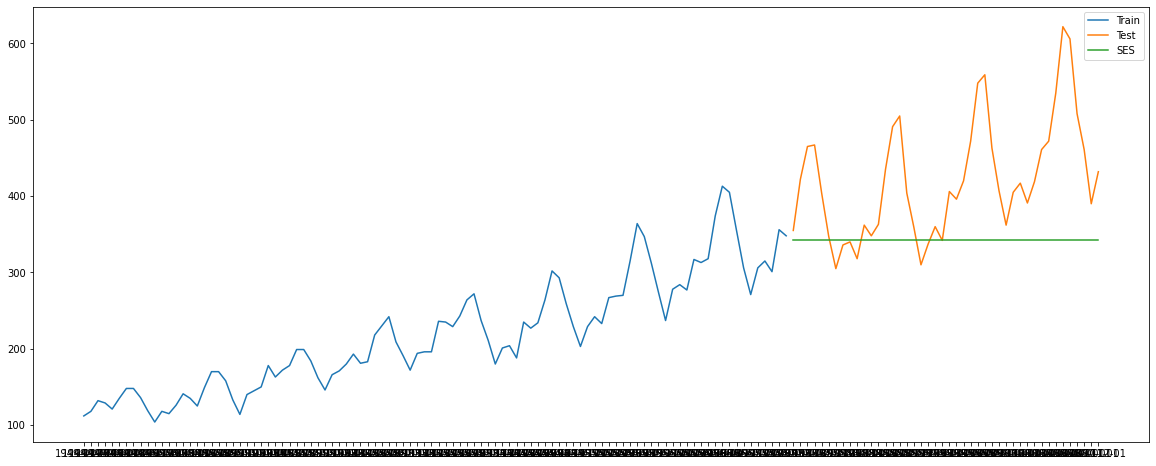

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['value'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
print("mae :", mean_absolute_error(test.value, y_hat_avg.SES))
print("rmse :", sqrt(mean_squared_error(test.value, y_hat_avg.SES)))

mae : 83.23242779477344
rmse : 109.29360124771299


# **Holt Linear Trend**

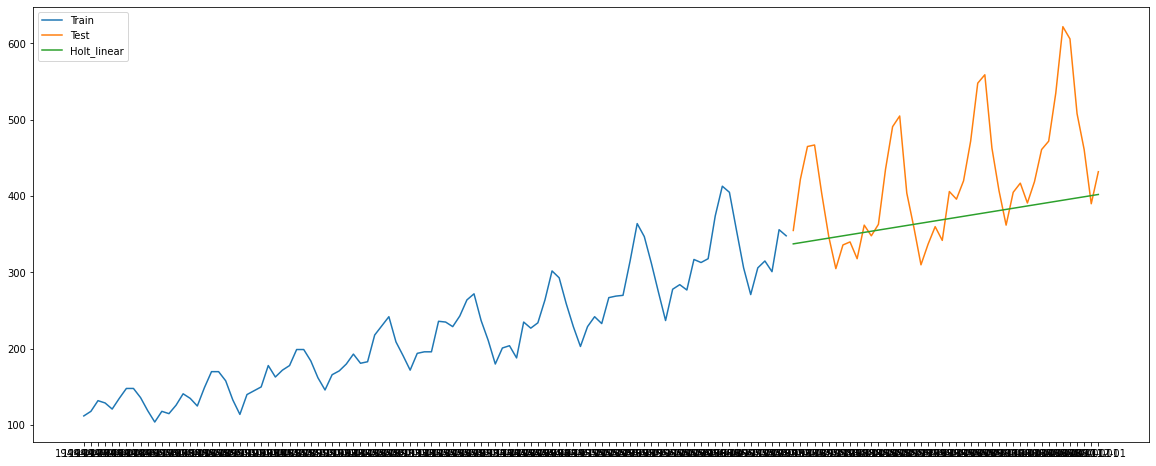

In [ ]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
print("mae :", mean_absolute_error(test.value, y_hat_avg.Holt_linear))
print("rmse :", sqrt(mean_squared_error(test.value, y_hat_avg.Holt_linear)))

mae : 62.87473217303202
rmse : 86.15565162839667


# **Holt-Winters**

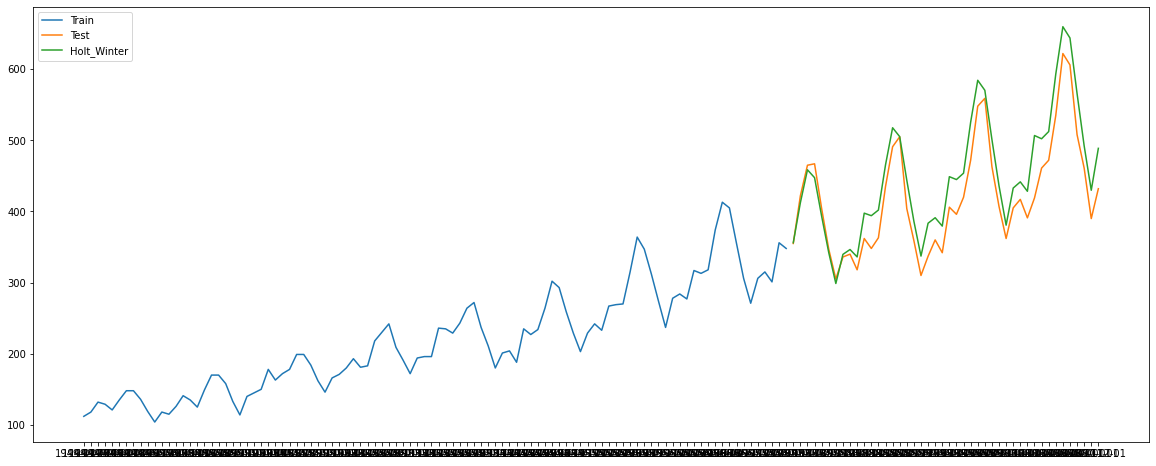

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['value']) ,seasonal_periods=12 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot( train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
print("mae :", mean_absolute_error(test.value, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test.value, y_hat_avg.Holt_Winter)))

mae : 31.040626120352034
rmse : 35.91231610859689
